<a href="https://colab.research.google.com/github/shbnmsgr/CropTypeMapping/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, cohen_kappa_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data loading:

In [3]:
path = '/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/subset1/S2_LAI/'
model = 'RandomForest/'

# x_train = np.load(path + 'x_train.npy')
y_train = np.load(path + 'y_train.npy')
# x_test = np.load(path + 'x_test.npy')
y_test = np.load(path + 'y_test.npy')
# x_un = np.load(path + 'x_un.npy')
# y_un = np.load(path + 'y_un.npy')


In [4]:

y_pred_test = np.load(path + model + 'y_pred_test.npy')
y_pred_train = np.load(path + model +  'y_pred_train.npy')
y_pred_un = np.load(path + model + 'y_pred_un.npy')

In [5]:
print(y_pred_un.shape)
print(y_pred_test.shape)
print(y_pred_train.shape)
(1851040)+(97854)+(228326)

(1851040,)
(97854,)
(228326,)


2177220

In [6]:
ind_test = np.load(path + 'ind_test.npy')
ind_train = np.load(path + 'ind_train.npy')
ind_un = np.load(path + 'ind_un.npy')

In [7]:
width = np.load(path+'width.npy')
height = np.load(path+'height.npy')


In [8]:
140855 +36142+14691+12555+24083




228326

# classification results:

In [9]:
conMatrix = confusion_matrix(y_test, y_pred_test)
print(conMatrix)
np.save(path + model + 'conMatrix.npy',conMatrix)

[[59678    24   476    74   114]
 [   28  5342     2     0     9]
 [ 1154     1 14112    12   211]
 [  484     5    33  5753    21]
 [  141     5   107     2 10066]]


In [10]:
# OA: overall accuracy 
OA = (conMatrix[0,0] + conMatrix[1,1] + conMatrix[2,2] + conMatrix[3,3] + conMatrix[4,4])/sum(sum(conMatrix))

# KC: kappa coefficient
KC = cohen_kappa_score(y_test, y_pred_test)

# OE: omission error
OE_class_1 = (sum(conMatrix[:,0])- conMatrix[0,0])/ sum(conMatrix[:,0])
OE_class_2 = (sum(conMatrix[:,1])- conMatrix[1,1])/ sum(conMatrix[:,1])
OE_class_3 = (sum(conMatrix[:,2])- conMatrix[2,2])/ sum(conMatrix[:,2])
OE_class_4 = (sum(conMatrix[:,3])- conMatrix[3,3])/ sum(conMatrix[:,3])
OE_class_5 = (sum(conMatrix[:,4])- conMatrix[4,4])/ sum(conMatrix[:,4])

# CE: commission error
CE_class_1 = (sum(conMatrix[0,:])- conMatrix[0,0])/ sum(conMatrix[0,:])
CE_class_2 = (sum(conMatrix[1,:])- conMatrix[1,1])/ sum(conMatrix[1,:])
CE_class_3 = (sum(conMatrix[2,:])- conMatrix[2,2])/ sum(conMatrix[2,:])
CE_class_4 = (sum(conMatrix[3,:])- conMatrix[3,3])/ sum(conMatrix[3,:])
CE_class_5 = (sum(conMatrix[4,:])- conMatrix[4,4])/ sum(conMatrix[4,:])

# UA: user accuracy
UA_class_1 = conMatrix[0,0]/ sum(conMatrix[0,:])
UA_class_2 = conMatrix[1,1]/ sum(conMatrix[1,:])
UA_class_3 = conMatrix[2,2]/ sum(conMatrix[2,:])
UA_class_4 = conMatrix[3,3]/ sum(conMatrix[3,:])
UA_class_5 =  conMatrix[4,4]/ sum(conMatrix[4,:])



# PA: producer accuracy
PA_class_1 = conMatrix[0,0]/ sum(conMatrix[:,0])
PA_class_2 = conMatrix[1,1]/ sum(conMatrix[:,1])
PA_class_3 = conMatrix[2,2]/ sum(conMatrix[:,2])
PA_class_4 = conMatrix[3,3]/ sum(conMatrix[:,3])
PA_class_5 = conMatrix[4,4]/ sum(conMatrix[:,4])




In [11]:
import pandas as pd

In [12]:
data = np.array([['', 'wheat', 'otherFields', 'barley','rapseed','bare'],
                ['PA',PA_class_1,PA_class_2,PA_class_3,PA_class_4,PA_class_5],
                ['UA',UA_class_1,UA_class_2,UA_class_3,UA_class_4,UA_class_5],
                ['OE',OE_class_1,OE_class_2,OE_class_3,OE_class_4,OE_class_5],
                ['CE',CE_class_1,CE_class_2,CE_class_3,CE_class_4,CE_class_5],
                ['OA','','',OA,'',''],
                ['KC','','',KC,'','']])
accuracy = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

print(accuracy)

accuracy.to_pickle(path + model +  "Accuracy.pkl")

                   wheat           otherFields               barley  \
PA    0.9706107180613157     0.993490794123117   0.9580448065173116   
UA    0.9886028559122685    0.9927522765285263   0.9110393802453196   
OE   0.02938928193868423   0.00650920587688302  0.04195519348268839   
CE  0.011397144087731504  0.007247723471473704  0.08896061975468043   
OA                                                0.970333353771946   
KC                                               0.9479950751021865   

                 rapseed                  bare  
PA    0.9849340866290018    0.9659341713847039  
UA    0.9137547649301143    0.9752930917546749  
OE  0.015065913370998116  0.034065828615296036  
CE   0.08624523506988564  0.024706908245325065  
OA                                              
KC                                              


# Image Export:

In [13]:
final_classification_2D = np.zeros((width*height,1))

In [14]:
for i in range(ind_test.shape[0]):
  final_classification_2D[int(int(ind_test[i])-1)] = y_pred_test[i]

In [15]:
for i in range(ind_train.shape[0]):
  final_classification_2D[int(int(ind_train[i])-1)] = y_pred_train[i]

In [16]:

print(ind_un.shape[0])
print(y_pred_un.shape)

1851040
(1851040,)


In [17]:
for i in range(ind_un.shape[0]):
  final_classification_2D[int(int(ind_un[i])-1)] = y_pred_un[i]

wheat = 10, other = 20, mask = 0,
barley = 30,
rapseed = 40,
bare = 50

In [18]:
c = np.zeros_like(final_classification_2D)


In [19]:
c[final_classification_2D==1] = 10
c[final_classification_2D==3] = 20
c[final_classification_2D==4] = 30
c[final_classification_2D==5] = 40
c[final_classification_2D==6] = 50

In [20]:
b = np.reshape(c,(height,width))
np.save(path + model + 'predictedImage.npy', b)

In [21]:
import matplotlib.pyplot as plt

In [22]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


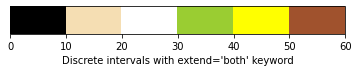

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)


cmap = ListedColormap(["black", "wheat", "white", "yellowgreen", "yellow","sienna"])

bounds = [0, 10, 20, 30, 40, 50, 60]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

In [24]:
ground_truth_2D = np.load(path + 'ground_truth_2D.npy')

In [25]:
c2 = np.zeros_like(ground_truth_2D)

In [26]:
c2[ground_truth_2D==0] = 0
c2[ground_truth_2D==1] = 10
c2[ground_truth_2D==2] = 0
c2[ground_truth_2D==3] = 20
c2[ground_truth_2D==4] = 30
c2[ground_truth_2D==5] = 40
c2[ground_truth_2D==6] = 50

In [27]:
height,width

(array(1618), array(2607))

In [28]:
b2 = np.reshape(c2,(height,width))

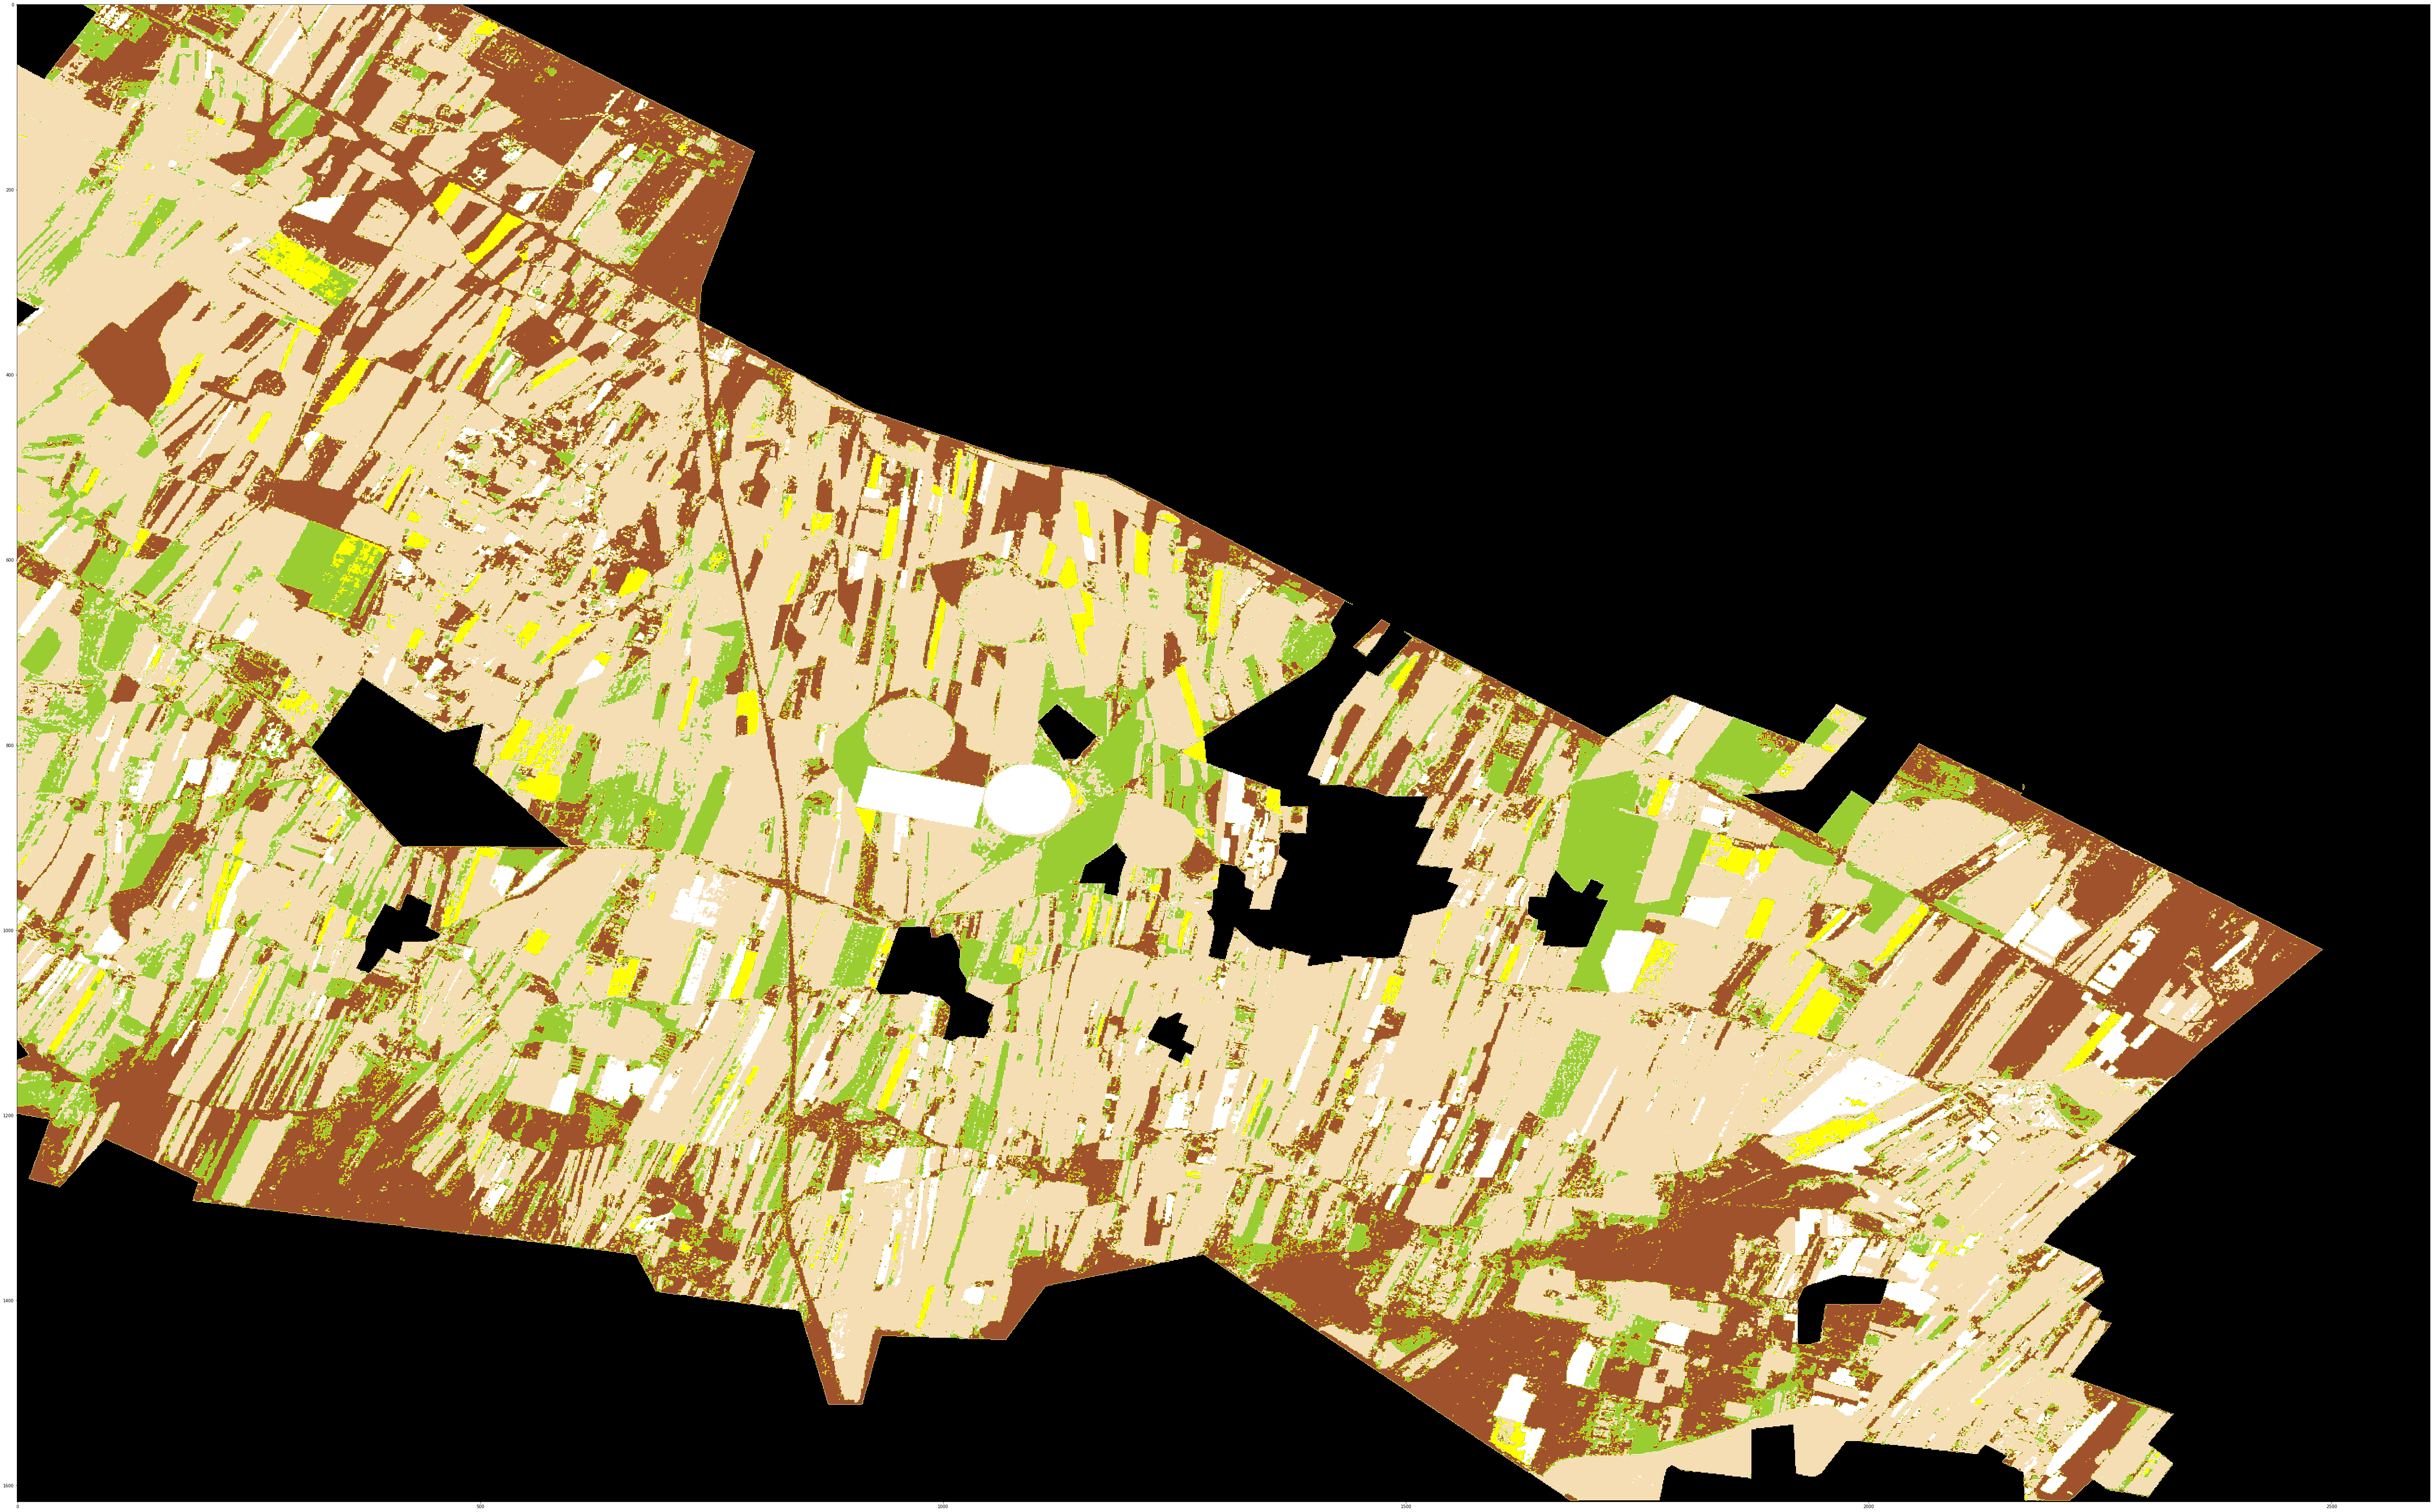

In [29]:
plt.figure(figsize = (100,100))
plt.imshow(b, vmin=0, vmax=50, cmap=cmap)
plt.show()

([], <a list of 0 Text major ticklabel objects>)

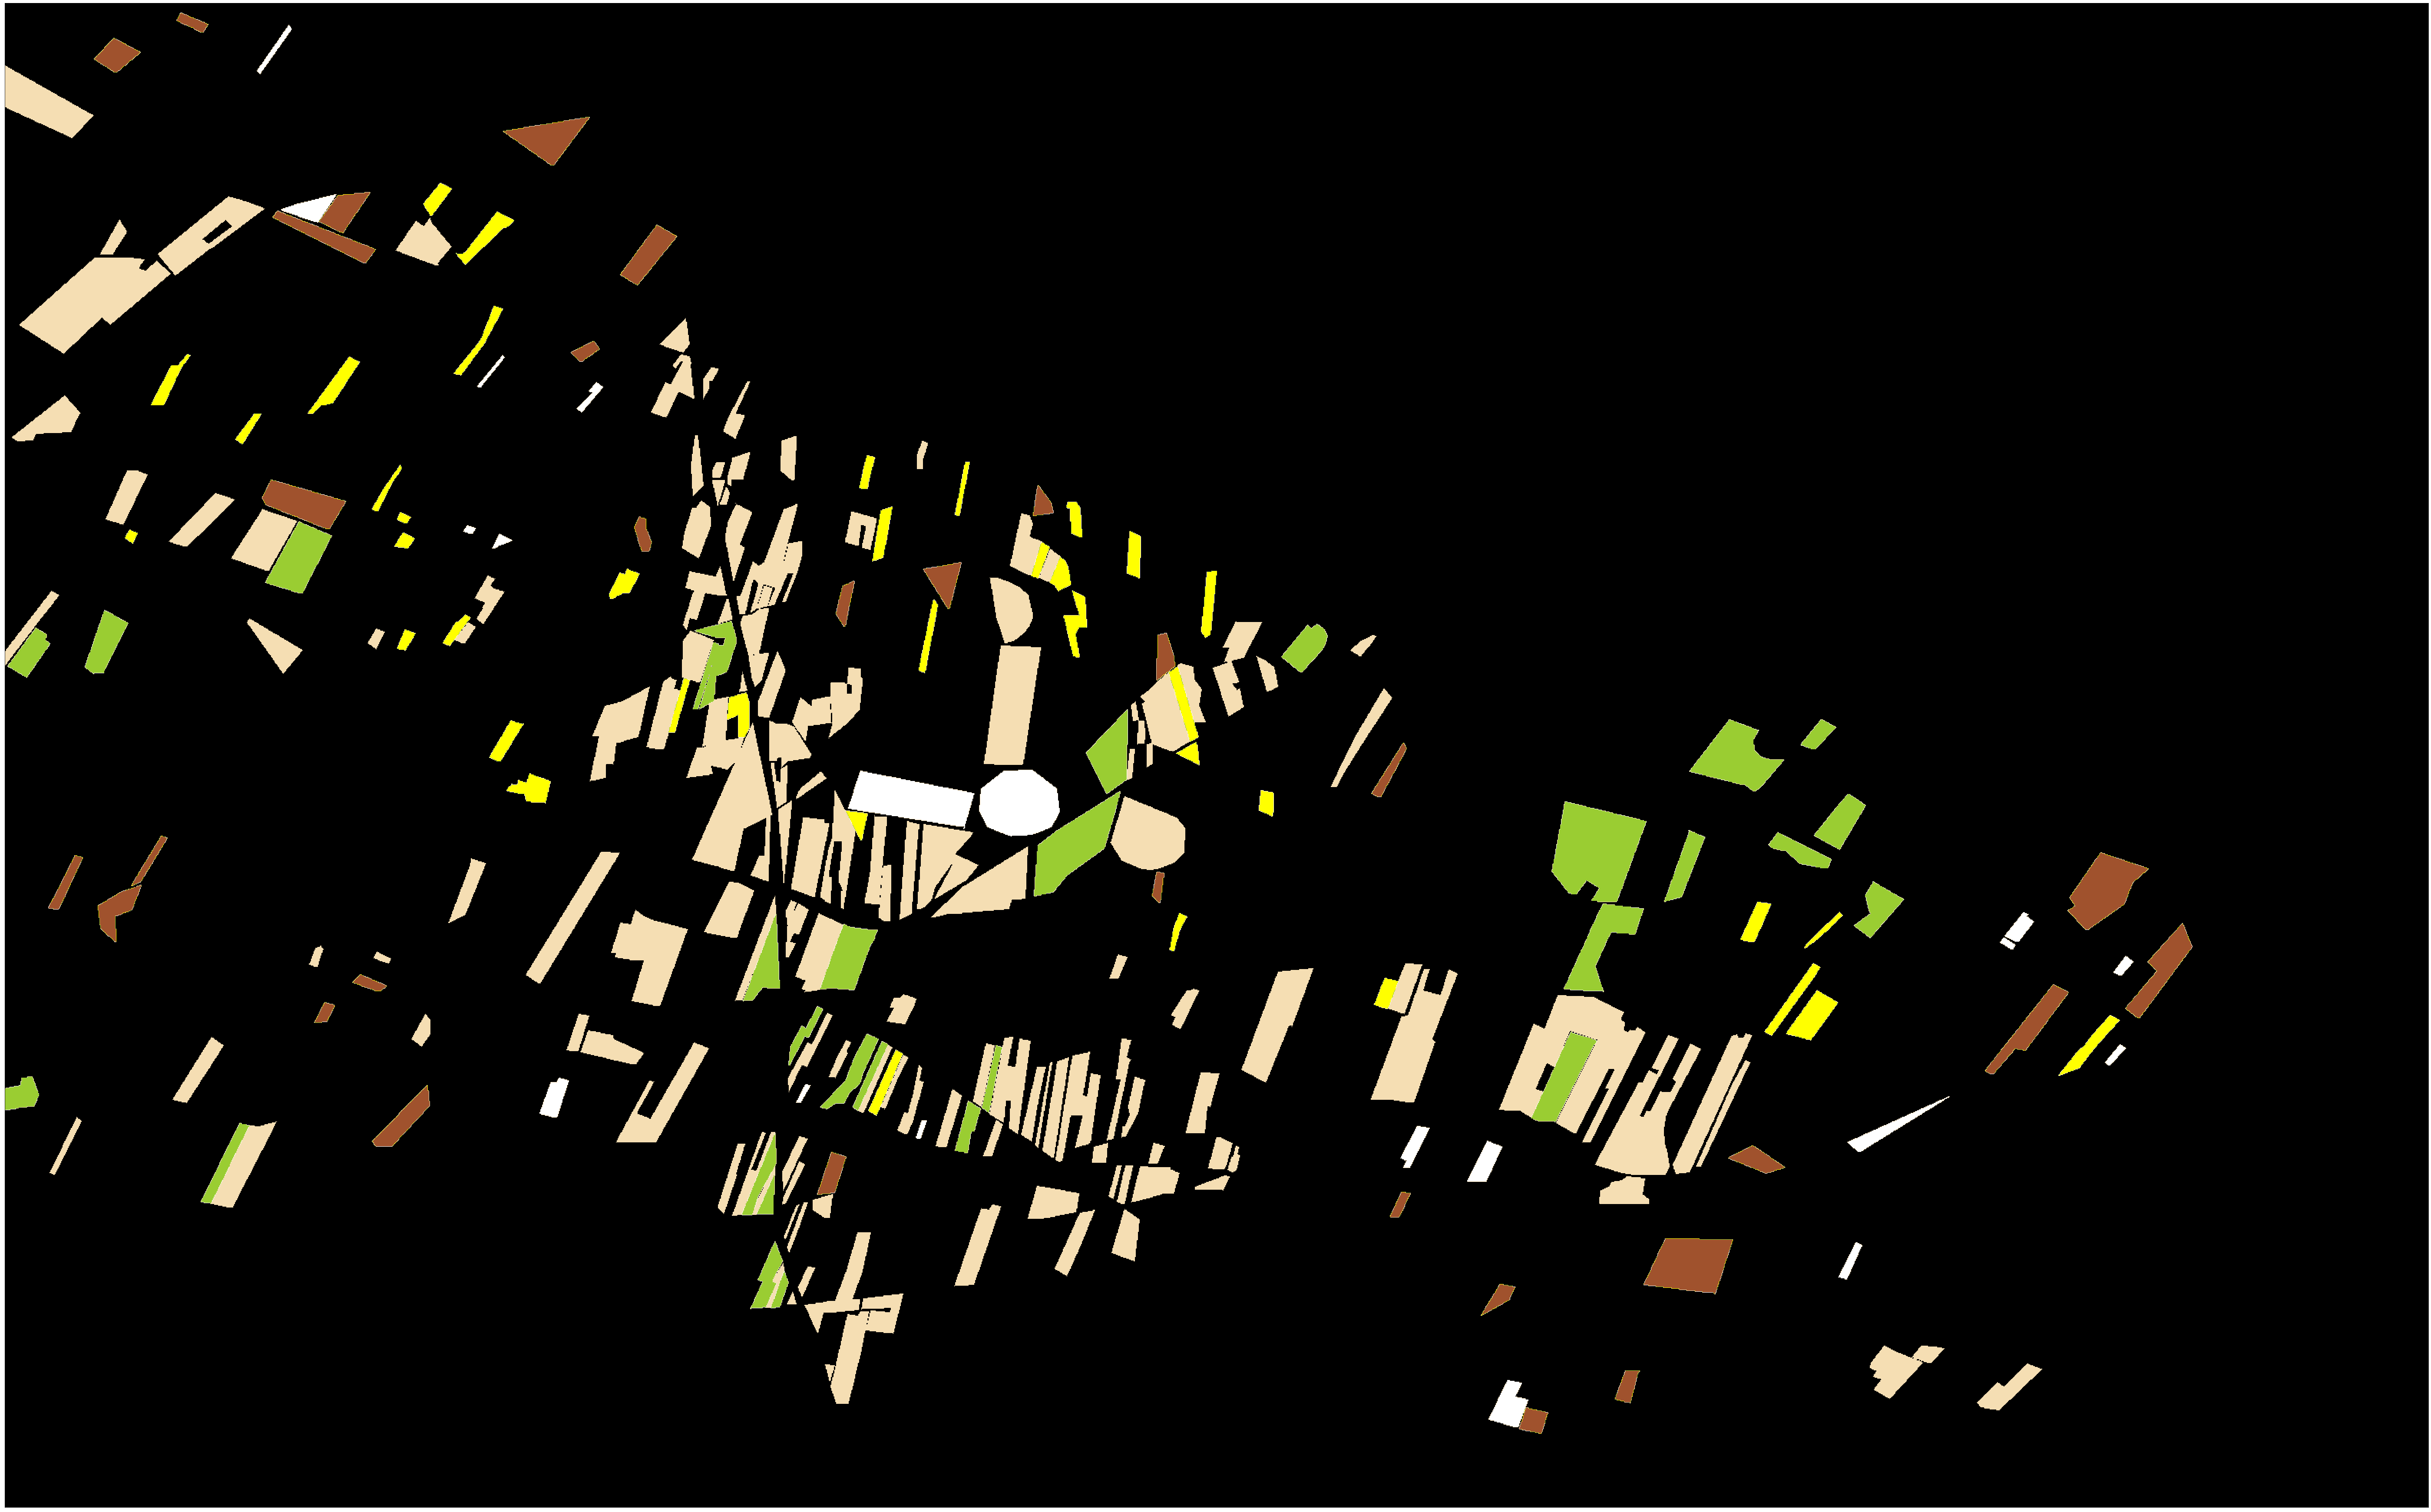

In [32]:
# fig = plt.figure(figsize=(100,200))
plt.figure(figsize=(100,100))
# plt.subplot(1,2,1)
plt.imshow(b2, vmin=0, vmax=50, cmap=cmap)
plt.xticks([])
plt.yticks([])
# plt.savefig(path + 'grundtruthI1.png',dpi = 300)
# plt.subplot(1,2,2)
# plt.figure(figsize=(100,100))
# plt.imshow(b, vmin=0, vmax=50, cmap=cmap)
# plt.xticks([])
# plt.yticks([])
# plt.savefig(path + model +  'I2.png',dpi = 300, bbox_inches='tight', pad_inches=0.01)

In [31]:
# plt.savefig(path + 'grundtruthI1.png',dpi = 600)